39  random numbers from Poisson distribution (mean= 4 ):
[5 4 4 4 2 5 2 5 3 5 7 1 4 3 3 0 5 4 6 7 1 5 2 6 6 4 3 5 5 2 1 3 6 4 2 2 3
 4 4]

Summary Statistics:
Mean: 3.769230769230769
Standard Deviation: 1.701606156208929
39  random numbers from Poisson distribution (mean= 2 ):
[3 2 2 0 5 0 1 2 0 1 2 3 1 0 2 4 1 2 5 0 2 2 2 2 2 3 1 0 3 0 0 3 4 2 0 3 2
 0 0]

Summary Statistics:
Mean: 1.7179487179487178
Standard Deviation: 1.4132834645662224
poisson_numbers_1 Tests:


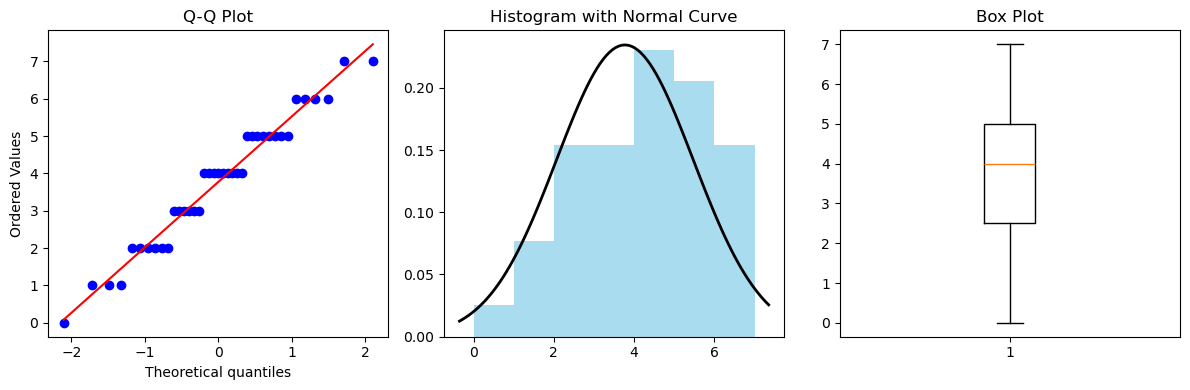


Shapiro-Wilk Test:
  statistic: 0.9631632947267588
  p-value: 0.22704384156927876

Anderson-Darling Test:
  statistic: 0.6199653064376847
  critical_values: [0.53  0.604 0.725 0.845 1.005]
  significance_level: [15.  10.   5.   2.5  1. ]

Kolmogorov-Smirnov Test:
  statistic: 0.8746857654877183
  p-value: 1.3879573299821452e-35

Jarque-Bera Test:
  statistic: 0.769737963381269
  p-value: 0.6805397935370439


poisson_numbers_2 Data Tests:


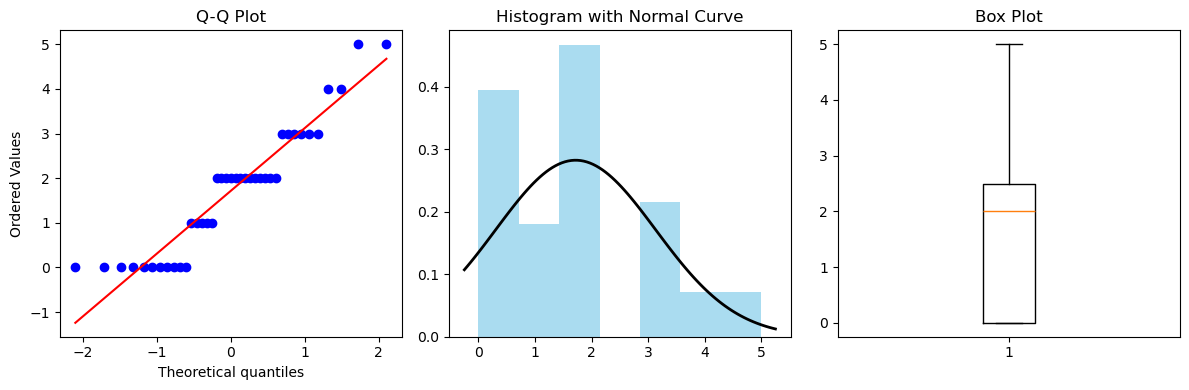


Shapiro-Wilk Test:
  statistic: 0.8927614431892829
  p-value: 0.00137718182654751

Anderson-Darling Test:
  statistic: 1.4703282256235823
  critical_values: [0.53  0.604 0.725 0.845 1.005]
  significance_level: [15.  10.   5.   2.5  1. ]

Kolmogorov-Smirnov Test:
  statistic: 0.5669934577954105
  p-value: 2.2608476713685615e-12

Jarque-Bera Test:
  statistic: 1.6309957686513963
  p-value: 0.44241899903188253
T-Test Analysis:

Group 1:
  mean: 3.769230769230769
  std: 1.7238503180463032
  size: 39

Group 2:
  mean: 1.7179487179487178
  std: 1.431758542358569
  size: 39

T-Test Results:
  t-statistic: 5.716588778413997
  p-value: 2.1870179725968852e-07
  statistically_significant: True

Interpretation:
  Reject null hypothesis if p-value < 0.05


/tmp/ipykernel_386/3403228858.py:239: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([array1, array2], labels=['Group 1', 'Group 2'])


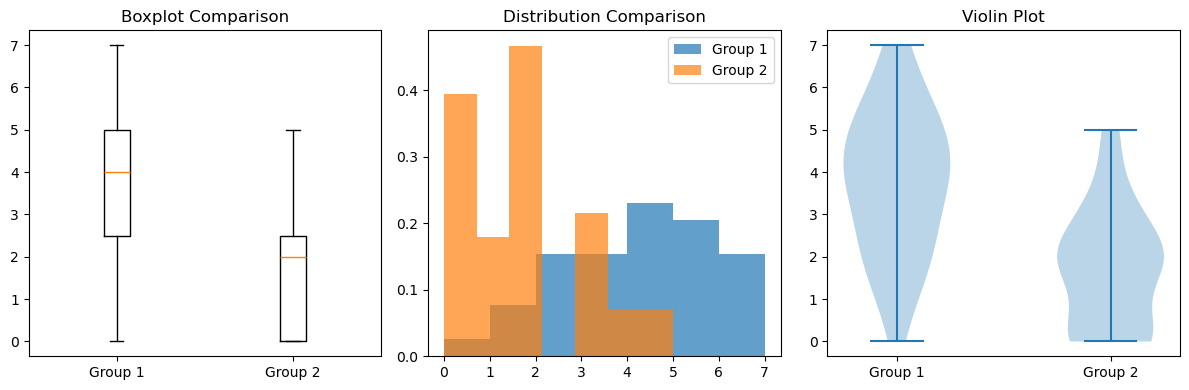

Mann-Whitney U Test Analysis:

Group 1:
  median: 4.0
  mean: 3.769230769230769
  std: 1.7238503180463032
  size: 39

Group 2:
  median: 2.0
  mean: 1.7179487179487178
  std: 1.431758542358569
  size: 39

Mann-Whitney U Test Results:
  U-statistic: 1235.0
  p-value: 1.5559613596777614e-06
  statistically_significant: True

Interpretation:
  Reject null hypothesis if p-value < 0.05


In [5]:
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)
Av1=4
Av2=2
No1=39
No2=39
# Generate 24 random numbers from a Poisson distribution with mean 60
poisson_numbers_1 = np.random.poisson(lam=Av1, size=No1)

# Print the generated numbers
print(No1," random numbers from Poisson distribution (mean=",Av1,"):")
print(poisson_numbers_1)

# Optional: Basic statistical summary
print("\nSummary Statistics:")
print(f"Mean: {np.mean(poisson_numbers_1)}")
print(f"Standard Deviation: {np.std(poisson_numbers_1)}")

# Set a random seed for reproducibility
np.random.seed(23)

# Generate 24 random numbers from a Poisson distribution with mean 60
poisson_numbers_2 = np.random.poisson(lam=Av2, size=No2)

# Print the generated numbers
print(No2," random numbers from Poisson distribution (mean=",Av2,"):")
print(poisson_numbers_2)

# Optional: Basic statistical summary
print("\nSummary Statistics:")
print(f"Mean: {np.mean(poisson_numbers_2)}")
print(f"Standard Deviation: {np.std(poisson_numbers_2)}")

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def test_normality(data):
    """
    Perform multiple normality tests on the input data.
    
    Parameters:
    -----------
    data : numpy.ndarray
        Input array to test for normality
    
    Returns:
    --------
    dict : A dictionary containing results of different normality tests
    """
    # Shapiro-Wilk Test
    shapiro_statistic, shapiro_p_value = stats.shapiro(data)
    
    # Anderson-Darling Test
    anderson_result = stats.anderson(data, dist='norm')
    
    # Kolmogorov-Smirnov Test
    ks_statistic, ks_p_value = stats.kstest(data, 'norm')
    
    # Jarque-Bera Test
    jarque_statistic, jarque_p_value = stats.jarque_bera(data)
    
    # Visual Tests
    plt.figure(figsize=(12, 4))
    
    # Q-Q Plot
    plt.subplot(131)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    
    # Histogram with Normal Distribution Overlay
    plt.subplot(132)
    plt.hist(data, bins='auto', density=True, alpha=0.7, color='skyblue')
    mu, std = np.mean(data), np.std(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title('Histogram with Normal Curve')
    
    # Box Plot
    plt.subplot(133)
    plt.boxplot(data)
    plt.title('Box Plot')
    
    plt.tight_layout()
    plt.show()
    
    # Compile results
    results = {
        "Shapiro-Wilk Test": {
            "statistic": shapiro_statistic,
            "p-value": shapiro_p_value
        },
        "Anderson-Darling Test": {
            "statistic": anderson_result.statistic,
            "critical_values": anderson_result.critical_values,
            "significance_level": anderson_result.significance_level
        },
        "Kolmogorov-Smirnov Test": {
            "statistic": ks_statistic,
            "p-value": ks_p_value
        },
        "Jarque-Bera Test": {
            "statistic": jarque_statistic,
            "p-value": jarque_p_value
        }
    }
    
    return results


print("poisson_numbers_1 Tests:")
poisson_numbers_1_results = test_normality(poisson_numbers_1)
for test, metrics in poisson_numbers_1_results.items():
    print(f"\n{test}:")
    for key, value in metrics.items():
        print(f"  {key}: {value}")

print("\n\npoisson_numbers_2 Data Tests:")
poisson_numbers_2_results = test_normality(poisson_numbers_2)
for test, metrics in poisson_numbers_2_results.items():
    print(f"\n{test}:")
    for key, value in metrics.items():
        print(f"  {key}: {value}")
import numpy as np
from scipy import stats

def perform_ttest(array1, array2, equal_var=False):
    """
    Perform a two-sided independent t-test between two NumPy arrays.
    
    Parameters:
    -----------
    array1 : numpy.ndarray
        First sample array
    array2 : numpy.ndarray
        Second sample array
    equal_var : bool, optional (default=False)
        Whether to assume equal variances between groups
        
    Returns:
    --------
    dict : A dictionary containing t-test results
    """
    # Compute t-statistic and p-value
    t_statistic, p_value = stats.ttest_ind(array1, array2, equal_var=equal_var)
    
    # Compute descriptive statistics
    results = {
        "Group 1": {
            "mean": np.mean(array1),
            "std": np.std(array1, ddof=1),
            "size": len(array1)
        },
        "Group 2": {
            "mean": np.mean(array2),
            "std": np.std(array2, ddof=1),
            "size": len(array2)
        },
        "T-Test Results": {
            "t-statistic": t_statistic,
            "p-value": p_value,
            "statistically_significant": p_value < 0.05
        },
        "Interpretation": "Reject null hypothesis if p-value < 0.05"
    }
    
    return results

# Example usage
np.random.seed(42)

# Generate two sample arrays

# Perform t-test
ttest_results = perform_ttest(poisson_numbers_1, poisson_numbers_2)

# Print results
print("T-Test Analysis:")
for key, value in ttest_results.items():
    print(f"\n{key}:")
    if isinstance(value, dict):
        for subkey, subvalue in value.items():
            print(f"  {subkey}: {subvalue}")
    else:
        print(f"  {value}")

from scipy import stats
import matplotlib.pyplot as plt

def perform_mann_whitney_test(array1, array2):
    """
    Perform a Mann-Whitney U test between two NumPy arrays.
    
    Parameters:
    -----------
    array1 : numpy.ndarray
        First sample array
    array2 : numpy.ndarray
        Second sample array
    
    Returns:
    --------
    dict : A dictionary containing Mann-Whitney U test results
    """
    # Perform Mann-Whitney U test
    statistic, p_value = stats.mannwhitneyu(array1, array2, alternative='two-sided')
    
    # Compute descriptive statistics
    results = {
        "Group 1": {
            "median": np.median(array1),
            "mean": np.mean(array1),
            "std": np.std(array1, ddof=1),
            "size": len(array1)
        },
        "Group 2": {
            "median": np.median(array2),
            "mean": np.mean(array2),
            "std": np.std(array2, ddof=1),
            "size": len(array2)
        },
        "Mann-Whitney U Test Results": {
            "U-statistic": statistic,
            "p-value": p_value,
            "statistically_significant": p_value < 0.05
        },
        "Interpretation": "Reject null hypothesis if p-value < 0.05"
    }
    
    # Visualize distributions
    plt.figure(figsize=(12, 4))
    
    # Boxplot
    plt.subplot(131)
    plt.boxplot([array1, array2], labels=['Group 1', 'Group 2'])
    plt.title('Boxplot Comparison')
    
    # Kernel Density Estimation
    plt.subplot(132)
    plt.hist(array1, bins='auto', density=True, alpha=0.7, label='Group 1')
    plt.hist(array2, bins='auto', density=True, alpha=0.7, label='Group 2')
    plt.title('Distribution Comparison')
    plt.legend()
    
    # Violin Plot
    plt.subplot(133)
    plt.violinplot([array1, array2])
    plt.title('Violin Plot')
    plt.xticks([1, 2], ['Group 1', 'Group 2'])
    
    plt.tight_layout()
    plt.show()
    
    return results

# Example usage

# Perform Mann-Whitney U test
mw_results = perform_mann_whitney_test(poisson_numbers_1, poisson_numbers_2)

# Print results
print("Mann-Whitney U Test Analysis:")
for key, value in mw_results.items():
    print(f"\n{key}:")
    if isinstance(value, dict):
        for subkey, subvalue in value.items():
            print(f"  {subkey}: {subvalue}")
    else:
        print(f"  {value}")
        